In [52]:
import pandas as pd
from fitter import Fitter, get_common_distributions,get_distributions
import seaborn as sns

def load_data_set(name):
    return pd.read_csv(f'include/{name}.csv')

def plot_histogram(df,target):
    fig = sns.displot(data=df, x=target, kind="hist", bins=100, aspect=1.5)
    fig.savefig("histogram.png")

def fitting_all(values):
    f = Fitter(values,
               distributions=get_common_distributions())
    f.fit()
    f.summary().to_excel('saida.xlsx')
    f.get_best(method='sumsquare_error')
    return f.get_best(method='sumsquare_error')

def fitting_best(values,best):
    f = Fitter(values,
               distributions=[best])
    f.fit()
    f.summary().to_excel('saida-best.xlsx')
    f.get_best(method='sumsquare_error')
    return f.get_best(method='sumsquare_error')



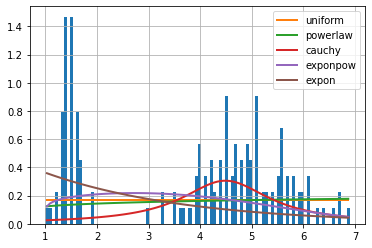

In [53]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

best = fitting_all(df['petal length (cm)'])
